# Etapas

- Importação da Base de Dados
- Tratamento dos Dados
- Cálculos
- Envio dos e-mails

### Importação da Base de Dados

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
df_vendas = pd.read_excel('vendas.xlsx')

In [148]:
df_vendas.head(5)

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,1,2019-01-01,Iguatemi Esplanada,Sapato Estampa,1,358,358
1,1,2019-01-01,Iguatemi Esplanada,Camiseta,2,180,360
2,1,2019-01-01,Iguatemi Esplanada,Sapato Xadrez,1,368,368
3,2,2019-01-02,Norte Shopping,Relógio,3,200,600
4,2,2019-01-02,Norte Shopping,Chinelo Liso,1,71,71


## Tratamento dos Dados

In [149]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100999 entries, 0 to 100998
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Código Venda    100999 non-null  int64         
 1   Data            100999 non-null  datetime64[ns]
 2   ID Loja         100999 non-null  object        
 3   Produto         100999 non-null  object        
 4   Quantidade      100999 non-null  int64         
 5   Valor Unitário  100999 non-null  int64         
 6   Valor Final     100999 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 5.4+ MB


##### Removendo Colunas Desnecessárias e Renomeando

In [150]:
nomes_colunas = {
    'Código Venda':'ID_VENDA',
    'Data':'DATA',
    'ID Loja':'ID_LOJA',
    'Produto':'PRODUTO',
    'Quantidade':'QTDE',
    'Valor Unitário':'VLR_UNIT',
    'Valor Final':'VLR_FINAL'
}
df_vendas.rename(columns=nomes_colunas, inplace=True)
df_vendas.drop(columns=['DATA', 'ID_VENDA'], inplace=True)
df_vendas.head(5)

,ID_LOJA,PRODUTO,QTDE,VLR_UNIT,VLR_FINAL
0,Iguatemi Esplanada,Sapato Estampa,1,358,358
1,Iguatemi Esplanada,Camiseta,2,180,360
2,Iguatemi Esplanada,Sapato Xadrez,1,368,368
3,Norte Shopping,Relógio,3,200,600
4,Norte Shopping,Chinelo Liso,1,71,71


## Cálculos

##### Faturamento por Loja

In [151]:
faturamento_lojas = df_vendas[['ID_LOJA', 'VLR_FINAL']].groupby('ID_LOJA').sum()
faturamento_lojas.head(3)

,VLR_FINAL
ID_LOJA,
Bourbon Shopping SP,1726110
Center Shopping Uberlândia,1668921
Iguatemi Campinas,1762419


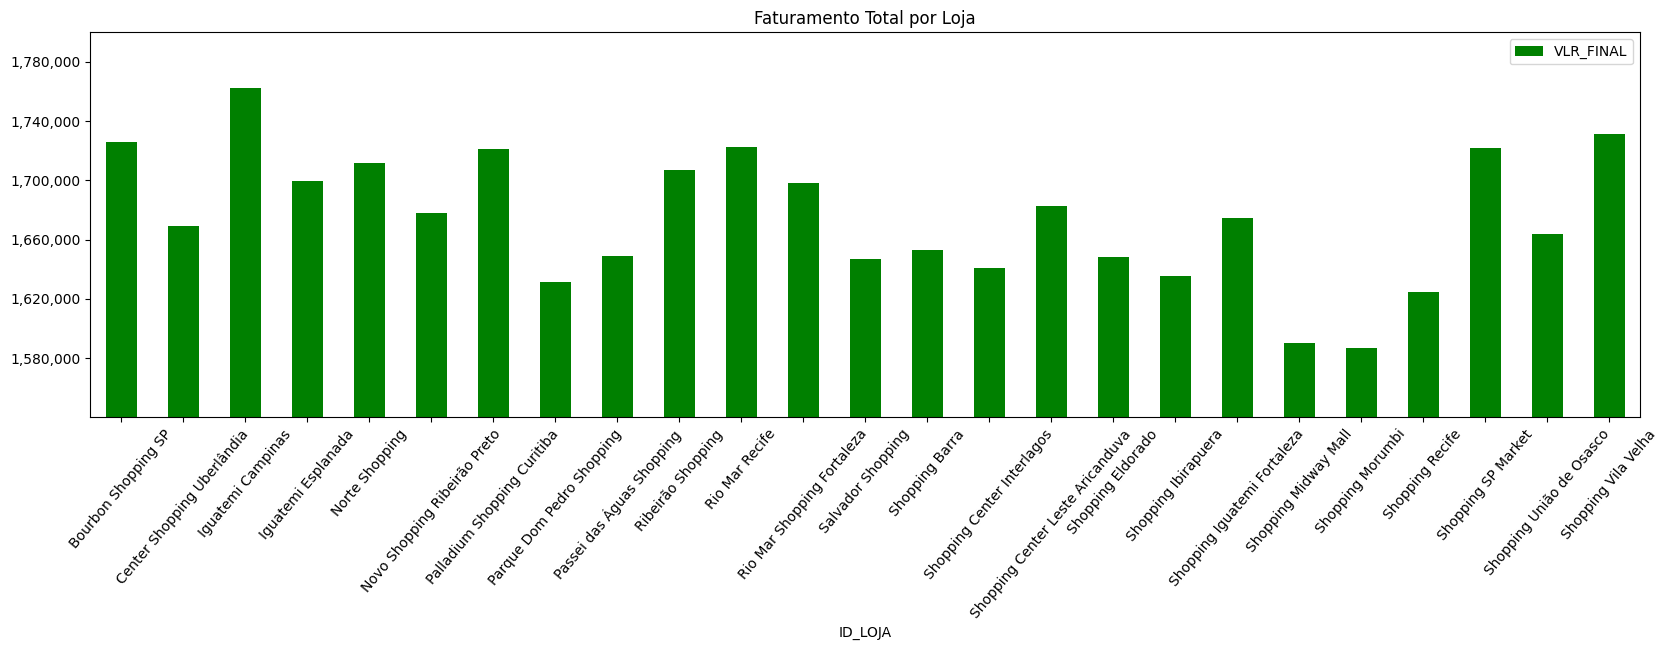

In [152]:
fig, ax = plt.subplots(figsize=(20,5))
faturamento_lojas.plot.bar(rot=50, title='Faturamento Total por Loja', ax=ax, color='green')
y_labels = [1580000, 1620000, 1660000, 1700000, 1740000, 1780000]
min_y = 1586444
ax.set_ylim(1540000, 1800000)
ax.set_yticks(y_labels)
ax.set_yticklabels([f'{val:,.0f}' for val in y_labels])
plt.savefig('faturamento_loja.png', bbox_inches='tight')
plt.show()

In [153]:
# Maior e Menor faturamento
faturamento_lojas = faturamento_lojas.reset_index()
display(faturamento_lojas)
indice = faturamento_lojas['VLR_FINAL'].idxmax()
id_maior = faturamento_lojas.at[indice, 'ID_LOJA']
maior_fat = max(faturamento_lojas['VLR_FINAL'])
print(f'Loja com o Maior Faturamento: {id_maior} - R$ {maior_fat:,.2f}')

indice = faturamento_lojas['VLR_FINAL'].idxmin()
id_menor = faturamento_lojas.at[indice, 'ID_LOJA']
menor_fat = min(faturamento_lojas['VLR_FINAL'])
print(f'Loja com o Menor Faturamento: {id_menor} - R$ {menor_fat:,.2f}')

,ID_LOJA,VLR_FINAL
0,Bourbon Shopping SP,1726110
1,Center Shopping Uberlândia,1668921
2,Iguatemi Campinas,1762419
3,Iguatemi Esplanada,1699681
4,Norte Shopping,1711968
5,Novo Shopping Ribeirão Preto,1678225
6,Palladium Shopping Curitiba,1721120
7,Parque Dom Pedro Shopping,1631630
8,Passei das Águas Shopping,1649014
9,Ribeirão Shopping,1707122


Loja com o Maior Faturamento: Iguatemi Campinas - R$ 1,762,419.00
Loja com o Menor Faturamento: Shopping Morumbi - R$ 1,586,444.00


## Quantidade de Produtos Vendidos por Loja

In [154]:
df_vendas.head(3)

,ID_LOJA,PRODUTO,QTDE,VLR_UNIT,VLR_FINAL
0,Iguatemi Esplanada,Sapato Estampa,1,358,358
1,Iguatemi Esplanada,Camiseta,2,180,360
2,Iguatemi Esplanada,Sapato Xadrez,1,368,368
